In [1]:
# import sys

# print("--sys.version—")
# print(sys.version)
# print(sys.executable)
# print(sys.path)
# sys.path.append("/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages")

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('..//Data//trainKOR//180713_2.csv')
print(df.columns) # 한글로 된 거 영어로 바꿔야됨

Index(['번호', '시간', 'FWD', 'REV', 'P/B', 'Motoring', 'Braking',
       'Train In Station', 'OP Mode', 'Target Speed', 'Permitted Speed',
       'Actual Speed', 'DISTANCE', 'Train Speed', 'VOBC ＃1', 'VOBC ＃0',
       'MR Pressure', 'Master Clock of VOBC', 'Line Voltage',
       'Train In Station.1', 'Next Platform ID', 'Final Platform ID',
       'Distance to Target', 'BC ＃1', 'BC ＃2', 'BC ＃3', 'BC ＃4', 'Unnamed: 27',
       'Unnamed: 28', 'BC ＃7', 'BC ＃0', 'Train Room Temp ＃1',
       'Train Outside Temp ＃1', '편성번호', '열차길이'],
      dtype='object')


In [3]:
print(df['OP Mode'].unique()) # 죄다 운전자 없음이니까 이 열은 버린다
print(df['편성번호'].unique()) # 전부 같은 번호에
print(df['열차길이'].unique()) # 같은 길이
print(df['VOBC ＃1'].unique())
print(df['VOBC ＃0'].unique())

['Driverless']
[1002]
[6]
[1]
[1]


In [5]:
df.drop(['번호', 
         'OP Mode', 
         '편성번호', 
         '열차길이',
         'VOBC ＃1',
         'VOBC ＃0',
         'Unnamed: 27', 
         'Unnamed: 28'
        ], axis=1, inplace=True) #번호 열 삭제 후 df 대체 

In [6]:
df.rename(columns={'시간': 'time'}, inplace=True)
df.columns = df.columns.str.lower()

In [7]:
df['p/b'] = df['p/b'].str[:-3]
df['p/b'] = df['p/b'].astype('int64')

df['time'] = df['time'].str.replace(':', '')
df['time'] = df['time'].astype('int64')

df['distance'] = df['distance'].str[:-3]
df['distance'] = df['distance'].astype('int64')

speedwords = ['target', 'permitted', 'actual', 'train']
for word in speedwords:
    df[f'{word} speed'] = df[f'{word} speed'].str[:-6]
    df[f'{word} speed'] = df[f'{word} speed'].astype('int64')

In [8]:
# print(df.shape)
# print(df.dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43004 entries, 0 to 43003
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   time                   43004 non-null  int64 
 1   fwd                    43004 non-null  int64 
 2   rev                    43004 non-null  int64 
 3   p/b                    43004 non-null  int64 
 4   motoring               43004 non-null  int64 
 5   braking                43004 non-null  int64 
 6   train in station       43004 non-null  int64 
 7   target speed           43004 non-null  int64 
 8   permitted speed        43004 non-null  int64 
 9   actual speed           43004 non-null  int64 
 10  distance               43004 non-null  int64 
 11  train speed            43004 non-null  int64 
 12  vobc ＃1                43004 non-null  int64 
 13  vobc ＃0                43004 non-null  int64 
 14  mr pressure            43004 non-null  object
 15  master clock of vob

In [9]:
df.describe() # 통계값들

,time,fwd,rev,p/b,motoring,braking,train in station,target speed,permitted speed,actual speed,distance,train speed,vobc ＃1,vobc ＃0,train in station.1
count,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.000000,43004.0,43004.0,43004.000000
mean,178181.920147,0.478072,0.424123,-2.674286,0.365571,0.433448,0.163194,1.953423,46.706748,39.484374,1670.239396,38.985722,1.0,1.0,0.163194
std,34450.304884,0.499525,0.494215,39.284994,0.481595,0.495557,0.369547,9.779357,33.687426,34.349977,1676.838522,33.929602,0.0,0.0,0.369547
min,120240.000000,0.000000,0.000000,-100.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,1.0,0.000000
25%,150156.750000,0.000000,0.000000,-43.000000,0.000000,0.000000,0.000000,0.000000,10.000000,0.000000,333.000000,0.000000,1.0,1.0,0.000000
50%,180107.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,44.000000,1463.000000,43.000000,1.0,1.0,0.000000
75%,210044.250000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,86.000000,68.000000,2387.000000,67.000000,1.0,1.0,0.000000
max,235959.000000,1.000000,1.000000,100.000000,1.000000,1.000000,1.000000,60.000000,90.000000,92.000000,8261.000000,91.000000,1.0,1.0,1.000000


In [10]:
#df.count()

In [10]:
df.head()

,time,fwd,rev,p/b,motoring,braking,train in station,target speed,permitted speed,actual speed,...,final platform id,distance to target,bc ＃1,bc ＃2,bc ＃3,bc ＃4,bc ＃7,bc ＃0,train room temp ＃1,train outside temp ＃1
0,120240,1,0,71,1,0,0,0,50,40,...,경기대학교행(17),3152 (m),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),23 (℃),23 (℃)
1,120241,1,0,71,1,0,0,0,90,43,...,경기대학교행(17),4918 (m),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),23 (℃),23 (℃)
2,120242,1,0,65,1,0,0,0,90,46,...,경기대학교행(17),4910 (m),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),23 (℃),23 (℃)
3,120243,1,0,63,1,0,0,0,90,48,...,경기대학교행(17),4903 (m),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),23 (℃),23 (℃)
4,120244,1,0,63,1,0,0,0,90,48,...,경기대학교행(17),4903 (m),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),0 (kPa),23 (℃),23 (℃)


In [11]:
df.tail()

,time,fwd,rev,p/b,motoring,braking,train in station,target speed,permitted speed,actual speed,...,final platform id,distance to target,bc ＃1,bc ＃2,bc ＃3,bc ＃4,bc ＃7,bc ＃0,train room temp ＃1,train outside temp ＃1
42999,235955,0,0,0,0,0,0,0,0,0,...,x(0),0 (m),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),336 (kPa),26 (℃),22 (℃)
43000,235956,0,0,0,0,0,0,0,0,0,...,x(0),0 (m),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),333 (kPa),26 (℃),22 (℃)
43001,235957,0,0,0,0,0,0,0,0,0,...,x(0),0 (m),330 (kPa),327 (kPa),324 (kPa),288 (kPa),336 (kPa),336 (kPa),26 (℃),22 (℃)
43002,235958,0,0,0,0,0,0,0,0,0,...,x(0),0 (m),330 (kPa),327 (kPa),324 (kPa),288 (kPa),333 (kPa),336 (kPa),26 (℃),22 (℃)
43003,235959,0,0,0,0,0,0,0,0,0,...,x(0),0 (m),330 (kPa),327 (kPa),321 (kPa),288 (kPa),336 (kPa),336 (kPa),26 (℃),22 (℃)


ValueError: invalid literal for int() with base 10: ''

In [12]:
df.dtypes

time                      int64
fwd                       int64
rev                       int64
p/b                       int64
motoring                  int64
braking                   int64
train in station          int64
target speed              int64
permitted speed           int64
actual speed              int64
distance                  int64
train speed               int64
vobc ＃1                   int64
vobc ＃0                   int64
mr pressure              object
master clock of vobc     object
line voltage             object
train in station.1        int64
next platform id         object
final platform id        object
distance to target       object
bc ＃1                    object
bc ＃2                    object
bc ＃3                    object
bc ＃4                    object
bc ＃7                    object
bc ＃0                    object
train room temp ＃1       object
train outside temp ＃1    object
dtype: object

<AxesSubplot:xlabel='vobc ＃0', ylabel='train speed'>

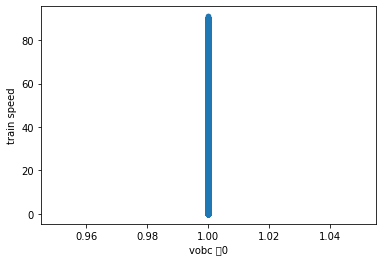

In [19]:
df.plot(x='vobc ＃0', y='train speed', kind = 'scatter')